# IMDB dataset sentiment analysis with recurrent nets

In [1]:
import numpy as np

In [2]:
pwd  # check which directory you are in, and make sure that you download files from Moodle to this directory

'/home/noio0925/Desktop/rhul/rhul_DL/lab04'

# Data Preparation: skip this unless you really need to do it

Instead of evaluating the data preparation cells below (the ones that say "Do not run"), you should download the file called  `imdb_raw_and_coded_data.pickle` from moodle, which should contain the results of the (long) preprocessing. Skip on down to the section called "Start here!" 

This pickle file (Python serialization is called pickling) may possibly not load if you are using a different version of python, in which case you can start by downloading the aclImdb dataset from the address suggested below, and then processing it.  This may take some time if your disk access is slow. 

In [3]:
# DO NOT RUN THIS CODE UNLESS YOU HAVE TO
# IT MAY TAKE A LONG TIME 


# this code asumues you have downloaded the aclimdb dataset
# of 25000 film reviews from IMDB, labelled with positive (1) or 
# negative (0) sentiment, and that you have unzipped it into a 
# directory tree, starting from the directory aclImdb

# the dataset can be downloaded from ai.stanford.edu/~amaas/data/sentiment/ and other places

# the code below opens and reads 25000 files, and can be slow on some machines

import os

imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

n_processed =  0

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
            n_processed += 1
            if n_processed%1000 == 0:
                print(n_processed)
                     

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000


In [4]:
# DO NOT RUN THIS UNLESS YOU CANNOT LOAD THE PICKLE FILE BELOW

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 500  # We will cut reviews after 500 words
training_samples = 20000  # We will be training on 20000 samples
validation_samples = 5000  # We will be validating on 5000 samples
max_words = 10000  # We will only consider the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Using TensorFlow backend.


Found 88582 unique tokens.
Shape of data tensor: (25000, 500)
Shape of label tensor: (25000,)


In [5]:
x_train.shape,y_train.shape

((20000, 500), (20000,))

In [6]:
# DO NOT RUN this unless you have just processed all the data and newly created these variables
import pickle
pickle.dump( (texts, labels, word_index, x_train, y_train, x_val, y_val, tokenizer, indices ), 
            open("imdb_raw_and_coded_data.pickle","wb"))


# Start here!  Load the Processed Data

In [7]:
import pickle  # this is Python's seralizer package
from keras.preprocessing.sequence import pad_sequences
# this is a pickled file of the variables that you need, which I made earlier :) 
(texts, labels, word_index, x_train, y_train, x_val, y_val, tokenizer, indices ) = pickle.load(open("imdb_raw_and_coded_data.pickle","rb"))

max_words = 10000 # the maximum number of words that were allowed in the dictionary. 

Now have a look at the data: I should warn you that some objects are quite large. 
    
* `texts` is a python list of reviews.  Read some!  
* `labels` is a vector of sentiments, 0 for negative, 1 for positive. Check some. Do you agree? 
* `word_index` is a Python dict mapping words to numbers: this is a field of tokenizer, which is used to convert the reviews to vectors of numbers, one per word. 
* `x_train`, `x_val` are numpy arrays of tokenized reviews; `x_train` is the first 20000 reviews, `x_val` the rest. They have been cut to 500 words, and padded with zeros from the start if they are too short. You should check that the reviews and the texts correspond -- check that texts[17] and x_train[17] are the same review, using `word_index` to convert some words to their index numbers. 

In [24]:
texts[0], labels[0]

("I can barely find the words to express how utterly utterly awful this film is. I was sold on the promise of action, with Segal and stealth aircraft, which normally make for an entertaining action movie. I can honestly say I'd rather gouge my eyes out with a cocktail stick than have to see this film again. The acting was so awful that it was almost funny. The story was insanely weak, with plot holes so cavernously wide you could fly an F117 through them. The script was so poor, if I found out that a 10 year old wrote it I shouldn't be in the least surprised. The direction and production is so amateur, I wouldn't even hire these people to shoot my worst enemies wedding video. Utter Utter drivel. Those responsible for making this movie have cheapened the art, and they should be ashamed of themselves. Steven Segal should never ever show his face in public again, I can't imagine what made him agree to star in this, the worst film I have seen in my entire life.",
 0)

***DO NOT BE TEMPTED TO SKIP THIS - MAKE SURE YOU UNDERSTAND THE DATA!! ***

## Making up your own reviews to test the models :) 

In [8]:
# this is a function that converts reviews that you can write to test the system into coded vectors that you can 
# supply to the model, and get predictions for. 

# note that is accesses tokenizer as a global variable 

def encode_my_reviews( list_of_my_reviews, maxlen=500 ):
    my_sequences = tokenizer.texts_to_sequences(list_of_my_reviews)
    my_data = pad_sequences(my_sequences, maxlen=500)
    return my_data

In [9]:
# all you have to do is to construct a list of strings, each string being a review. You can 
# then use model.predict(encode_my_reviews(my_reviews)) to see what the model predicts about them. 
# Try to fool the models you construct! 
# How much do they really understand? 

my_reviews = [ "This was the worst film I have ever seen, and I fell asleep immediately.", 
              "This was the best film I have ever seen in my life. Truly wonderful from start to finish."]

In [10]:
my_reviews_coded = encode_my_reviews(my_reviews)

In [11]:
my_reviews_coded

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [25]:
my_reviews_coded.shape

(2, 500)

In [12]:
sum(y_val)

2483

In [13]:
# let's see what the encoded reviews actually look like. 
# Note that the padding is at the start of the sequence, so that the non-zero numbers are at the end 
my_reviews_coded

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [30]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Embedding

model = Sequential()
model.add(Embedding(max_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val,y_val))


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 19s 942us/step - loss: 0.6255 - acc: 0.6398 - val_loss: 0.4527 - val_acc: 0.7948
Epoch 2/10
20000/20000 [==============================] - 18s 914us/step - loss: 0.3899 - acc: 0.8351 - val_loss: 0.3538 - val_acc: 0.8562
Epoch 3/10
20000/20000 [==============================] - 18s 901us/step - loss: 0.2783 - acc: 0.8909 - val_loss: 0.3782 - val_acc: 0.8310
Epoch 4/10
20000/20000 [==============================] - 18s 920us/step - loss: 0.2170 - acc: 0.9181 - val_loss: 0.4417 - val_acc: 0.8086
Epoch 5/10
20000/20000 [==============================] - 18s 911us/step - loss: 0.1594 - acc: 0.9426 - val_loss: 0.3620 - val_acc: 0.8650
Epoch 6/10
20000/20000 [==============================] - 18s 908us/step - loss: 0.1168 - acc: 0.9593 - val_loss: 0.5892 - val_acc: 0.7886
Epoch 7/10
20000/20000 [==============================] - 18s 924us/step - loss: 0.0821 - acc: 0.9728 - val_loss: 0.4

In [31]:
model.predict(my_reviews_coded)

array([[0.00052812],
       [0.31702435]], dtype=float32)

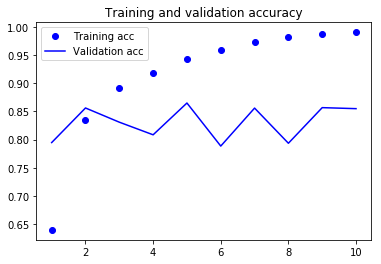

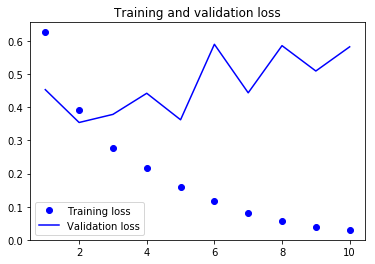

In [32]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=1,  # epochs take a long time, so train one at a time! 
                    batch_size=128,
                    validation_data=(x_val,y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/1
 4480/20000 [=====>........................] - ETA: 1:00 - loss: 0.6739 - acc: 0.6185

In [19]:
model.predict(my_reviews_coded)

array([[0.48729235],
       [0.8917715 ]], dtype=float32)

In [20]:
my_reviews

['This was the worst film I have ever seen, and I fell asleep immediately.',
 'This was the best film I have ever seen in my life. Truly wonderful from start to finish.']